https://moa.cms.waikato.ac.nz/datasets/
https://kt.ijs.si/elena_ikonomovska/data.html

In [1]:
from scipy.io import arff
import pandas as pd

In [2]:
data = arff.loadarff('airlines.arff')
data[1]

Dataset: out
	Airline's type is nominal, range is ('US', 'AA', 'AS', 'CO', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV', 'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN')
	Flight's type is numeric
	AirportFrom's type is nominal, range is ('PHX', 'LAX', 'SFO', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI', 'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK', 'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR', 'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM', 'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA', 'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL', 'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK', 'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW', 'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD', 'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX', 'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL', 'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB', 'CLT', 'LEX', 'MB

In [3]:
X = pd.DataFrame(data[0])
y = X.pop('Delay').astype(int)
X['Airline'] = X['Airline'].astype('category').cat.codes
X['AirportFrom'] = X['AirportFrom'].astype('category').cat.codes
X['AirportTo'] = X['AirportTo'].astype('category').cat.codes
X['DayOfWeek'] = X['DayOfWeek'].astype('category').cat.codes
X.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,4,269.0,253,135,2,15.0,205.0
1,14,1558.0,217,60,2,15.0,222.0
2,1,2400.0,154,80,2,20.0,165.0
3,1,2466.0,253,80,2,20.0,195.0
4,2,108.0,14,252,2,30.0,202.0


In [4]:
X.dtypes

Airline           int8
Flight         float64
AirportFrom      int16
AirportTo        int16
DayOfWeek         int8
Time           float64
Length         float64
dtype: object

<AxesSubplot:>

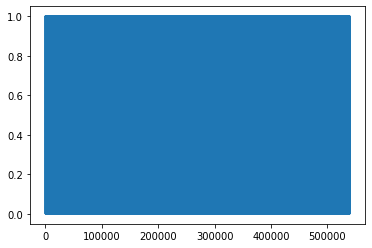

In [5]:
y.plot()

<AxesSubplot:>

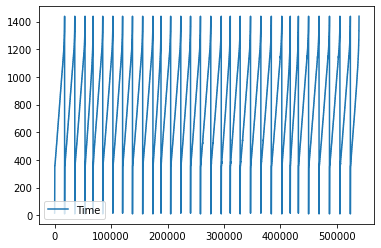

In [7]:
X.plot(y='Time')

<AxesSubplot:>

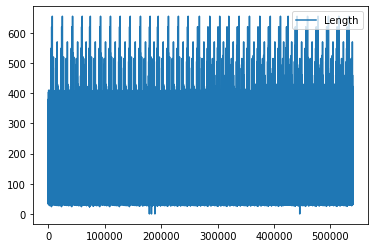

In [8]:
X.plot(y='Length')

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [13]:
%%time
clf_rf = RandomForestClassifier(n_jobs=4)
cross_val_score(clf_rf, X, y, cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time= 1.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] END .................................................... total time= 1.2min
[CV] END .................................................... total time= 1.6min
[CV] END .................................................... total time=  57.3s
[CV] END .................................................... total time=  51.4s
[CV] END .................................................... total time=  52.8s
[CV] END .................................................... total time=  57.1s
[CV] END .................................................... total time=  59.2s
[CV] END .................................................... total time=  58.9s
[CV] END .................................................... total time=  56.2s
CPU times: user 1min 11s, sys: 1min 33s, total: 2min 44s
Wall time: 10min 29s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 10.5min finished


array([0.62663379, 0.63314114, 0.54880513, 0.62210316, 0.59186473,
       0.63165116, 0.64019801, 0.5873781 , 0.60660388, 0.61926657])

In [14]:
n_samples = X.shape[0]
X_train1, y_train1 = X[:int(n_samples/3)], y[:int(n_samples/3)]
X_train2, y_train2 = X[:int(2*n_samples/3)], y[:int(2*n_samples/3)]
X_test, y_test = X[int(2*n_samples/3):], y[int(2*n_samples/3):]

In [24]:
from sklearn.model_selection import StratifiedKFold, train_test_split

In [25]:
def make_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    skf = StratifiedKFold(n_splits=10)
    best_score = 0
    for train_index, test_index in skf.split(X_train, y_train):
        clf = RandomForestClassifier(n_jobs=4)
        clf.fit(X.iloc[train_index], y.iloc[train_index])
        score = clf.score(X.iloc[test_index], y.iloc[test_index])
        if score > best_score:
            best_clf, best_score = clf, score
        print(score)
    print(f'best: {best_clf.score(X_test, y_test)} (test)')
    return best_clf

In [26]:
%%time
clf_a = make_classifier(X_train1, y_train1)

0.5976779755283649
0.6649749721913237
0.7016129032258065
0.6742908787541713
0.6675472747497219
0.6194118056038379
0.6363762775498852
0.655426545227004
0.6311617882222068
0.622610025724814
best: 0.8580605689813399 (test)
CPU times: user 5min 15s, sys: 10.3 s, total: 5min 25s
Wall time: 1min 34s


In [27]:
%%time
clf_b = make_classifier(X_train2, y_train2)

0.6470261063023603
0.6468870580873918
0.6059025967254146
0.6045468766294713
0.64539228977648
0.6421246567247193
0.6235964820801613
0.6002711440191887
0.6321827093544686
0.6022525810824904
best: 0.7629800606246002 (test)
CPU times: user 11min 57s, sys: 27 s, total: 12min 24s
Wall time: 4min 38s


In [28]:
clf_a.score(X_test, y_test)

0.5806056898133986

In [29]:
clf_b.score(X_test, y_test)

0.6048165966795517

In [30]:
import pickle

In [31]:
with open('classifiers.pickle', 'wb') as f:
    pickle.dump((clf_a, clf_b), f, pickle.HIGHEST_PROTOCOL)

In [32]:
n_samples = X.shape[0]
X_train1, y_train1 = X[:int(n_samples/3)], y[:int(n_samples/3)]
X_train2, y_train2 = X[int(n_samples/3):int(2*n_samples/3)], y[int(n_samples/3):int(2*n_samples/3)]
X_test, y_test = X[int(2*n_samples/3):], y[int(2*n_samples/3):]

In [33]:
def make_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    skf = StratifiedKFold(n_splits=10)
    best_score = 0
    for train_index, test_index in skf.split(X_train, y_train):
        clf = RandomForestClassifier(n_jobs=4)
        clf.fit(X.iloc[train_index], y.iloc[train_index])
        score = clf.score(X.iloc[test_index], y.iloc[test_index])
        if score > best_score:
            best_clf, best_score = clf, score
        print(score)
    print(f'best: {best_clf.score(X_test, y_test)} (test)')
    return best_clf

In [34]:
%%time
clf_a = make_classifier(X_train1, y_train1)

0.5988598442714127
0.6639321468298109
0.709051724137931
0.6744994438264739
0.6634454949944383
0.6218452339567545
0.6307446290759925
0.652297851630397
0.6346381144406591
0.6219147604811236
best: 0.8580605689813399 (test)
CPU times: user 5min 19s, sys: 11.6 s, total: 5min 31s
Wall time: 1min 54s


In [35]:
%%time
clf_b = make_classifier(X_train2, y_train2)

0.574805339265851
0.5692436040044494
0.610539488320356
0.6289627363737486
0.6471774193548387
0.6415907668775638
0.6246262949315163
0.6278245150524925
0.5799902662865883
0.5838142251268859
best: 0.8655969298367585 (test)
CPU times: user 5min 33s, sys: 15 s, total: 5min 48s
Wall time: 2min 29s


In [36]:
clf_a.score(X_test, y_test)

0.5802497288578659

In [37]:
clf_b.score(X_test, y_test)

0.5973024833838538

In [47]:
with open('classifiers.2.pickle', 'wb') as f:
    pickle.dump((clf_a, clf_b), f, pickle.HIGHEST_PROTOCOL)

In [42]:
from comparers import ModelComparer

In [44]:
comparer = ModelComparer(clf_a, clf_b, X.columns)
comparer.fit(X, y)

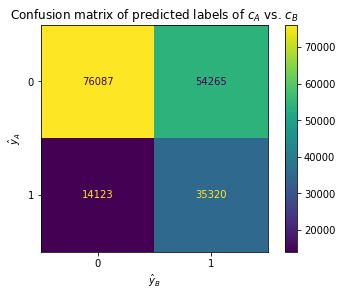

In [45]:
comparer.plot_confusion_matrix(X_test)

In [57]:
from sklearn.metrics import classification_report

In [61]:
def make_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    clf = RandomForestClassifier(n_jobs=4)
    clf.fit(X_train, y_train)
    print(classification_report(y_test, clf.predict(X_test)))
    return clf

In [62]:
%%time
clf_a = make_classifier(X_train1, y_train1)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     23632
           1       0.51      0.45      0.48     12327

    accuracy                           0.66     35959
   macro avg       0.62      0.61      0.61     35959
weighted avg       0.65      0.66      0.66     35959

CPU times: user 43.6 s, sys: 1.47 s, total: 45 s
Wall time: 14.2 s


In [63]:
%%time
clf_b = make_classifier(X_train2, y_train2)

              precision    recall  f1-score   support

           0       0.64      0.65      0.64     18534
           1       0.62      0.60      0.61     17425

    accuracy                           0.63     35959
   macro avg       0.63      0.63      0.63     35959
weighted avg       0.63      0.63      0.63     35959

CPU times: user 45.5 s, sys: 1.43 s, total: 46.9 s
Wall time: 13.8 s


In [59]:
print(classification_report(y_test, clf_a.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.80      0.65     88287
           1       0.66      0.37      0.47     91508

    accuracy                           0.58    179795
   macro avg       0.61      0.59      0.56    179795
weighted avg       0.61      0.58      0.56    179795



In [60]:
print(classification_report(y_test, clf_b.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60     88287
           1       0.62      0.60      0.61     91508

    accuracy                           0.61    179795
   macro avg       0.61      0.61      0.61    179795
weighted avg       0.61      0.61      0.61    179795



In [51]:
clf_a.score(X_test, y_test)

0.5821129619844824

In [52]:
clf_b.score(X_test, y_test)

0.6066798298061681

In [64]:
with open('classifiers.3.pickle', 'wb') as f:
    pickle.dump((clf_a, clf_b), f, pickle.HIGHEST_PROTOCOL)

In [54]:
from comparers import ModelComparer

In [55]:
comparer = ModelComparer(clf_a, clf_b, X.columns)
comparer.fit(X, y)

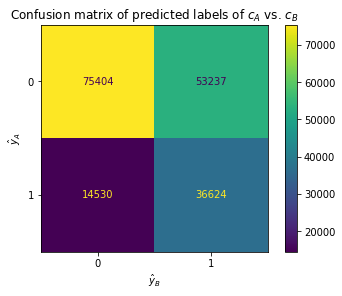

In [56]:
comparer.plot_confusion_matrix(X_test)